# 2.5.2: The Coffee Cooling Problems

In [1]:
#@title
# Import necessary libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')
download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/chap04.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
from ModSimPy_Functions.chap04 import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py
Downloaded ModSimPy_Functions/chap04.py


In [36]:
def make_system(T_init, volume, r, t_end, T_env):
    return dict(T_init=T_init, T_final=T_init, volume=volume,
                  r=r, t_end=t_end, T_env=T_env,
                  t_0=0, dt=1)

def change_func(t, T, system):
    r, T_env, dt = system['r'], system['T_env'], system['dt'] 
    dT = -r * (T - T_env) * dt   
    return dT

def run_simulation(system, change_func):
    t_array = np.arange(system['t_0'], system['t_end']+1, system['dt'])
    n = len(t_array)
    
    results = pd.Series(index=t_array,dtype=object)
    results.iloc[0] = system['T_init']
    
    for i in range(n-1):
        t = t_array[i]
        T = results.iloc[i]
        results.iloc[i+1] = T + change_func(t, T, system)
    
    system['T_final'] = results.iloc[-1]
    return results
    
def mix(system1, system2):
    
    V1, V2 = system1['volume'], system2['volume']
    T1, T2 = system1['T_final'], system2['T_final']
    
    V_mix = V1 + V2
    T_mix = (V1 * T1 + V2 * T2) / V_mix

    new_system = make_system(T_mix, V_mix, system1['r'], 30, 20)
    
    return new_system

Final temp, mixed cold at beginning 60.89377402
Final temp, mixed cold at the end 60.27
Final temp, mixed warm at end 62.37873953


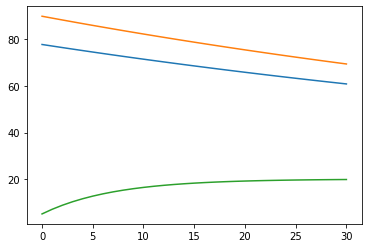

In [40]:
# Run three simulations
r_coffee = 0.0115
coffee = make_system(90, 300, r_coffee, 30, 20)

# Change r_milk to 0 to make it keep the same temperature
r_milk = 0.0
milk = make_system(5, 50, r_milk, 30, 20)

# Mix cold first 
mix_first1 = mix(coffee, milk)
mixA = run_simulation(mix_first1, change_func)
mixA.plot()

# Mix cold at the end
run_simulation(coffee, change_func)
run_simulation(milk, change_func)
mix_last1 = mix(coffee, milk)

# Mix warm at the end
r_coffee = 0.0115
coffee = make_system(90, 300, r_coffee, 30, 20)
r_milk = 0.133
milk = make_system(5, 50, r_milk, 30, 20)
cofC = run_simulation(coffee, change_func)
milkC = run_simulation(milk, change_func)
mix_last_warm = mix(coffee, milk)
cofC.plot()
milkC.plot()


print("Final temp, mixed cold at beginning", round(mix_first1['T_final'],8))
print("Final temp, mixed cold at the end", round(mix_last1['T_final'],2))
print("Final temp, mixed warm at end", round(mix_last_warm['T_final'],8))